### **Transformación de Datos con Polars**

En este apartado, aprenderemos a realizar diversas transformaciones de datos utilizando **Polars**. Polars es muy eficiente al manipular y transformar grandes volúmenes de datos gracias a su capacidad de procesamiento paralelo y su compatibilidad con la ejecución diferida (lazy execution). A continuación, cubriremos cómo crear nuevas columnas, tratar valores nulos y duplicados, pivotear tablas y visualizar los datos utilizando bibliotecas compatibles como **Seaborn**.

### **1. Creación de Nuevas Columnas**

Polars permite crear nuevas columnas de manera eficiente utilizando el método `with_columns()` para añadir columnas calculadas o transformadas.

#### **Ejemplo: Crear una nueva columna**

Supongamos que tenemos un DataFrame con información de productos y queremos calcular el valor total de ventas multiplicando el precio por la cantidad vendida.

In [2]:
import polars as pl

# Crear un DataFrame de ejemplo
df = pl.DataFrame({
    'Producto': ['Laptop', 'Tablet', 'Smartphone'],
    'Precio': [1000, 500, 800],
    'Cantidad': [5, 10, 8]
})

# Crear una nueva columna calculada 'Valor_Ventas'
df = df.with_columns(
    (pl.col('Precio') * pl.col('Cantidad')).alias('Valor_Ventas')
)

print(df)

shape: (3, 4)
┌────────────┬────────┬──────────┬──────────────┐
│ Producto   ┆ Precio ┆ Cantidad ┆ Valor_Ventas │
│ ---        ┆ ---    ┆ ---      ┆ ---          │
│ str        ┆ i64    ┆ i64      ┆ i64          │
╞════════════╪════════╪══════════╪══════════════╡
│ Laptop     ┆ 1000   ┆ 5        ┆ 5000         │
│ Tablet     ┆ 500    ┆ 10       ┆ 5000         │
│ Smartphone ┆ 800    ┆ 8        ┆ 6400         │
└────────────┴────────┴──────────┴──────────────┘


En este ejemplo, utilizamos `pl.col` para hacer referencia a las columnas existentes y `alias` para nombrar la nueva columna creada.

### **2. Tratamiento de Nulls y Duplicados**

#### **a. Manejo de valores nulos (nulls)**

Polars proporciona métodos como `fill_null()` para reemplazar los valores nulos y `drop_nulls()` para eliminarlos.

**Ejemplo: Rellenar valores nulos con un valor específico**

In [2]:
# Crear un DataFrame con valores nulos
df_null = pl.DataFrame({
    'Nombre': ['Ana', 'Luis', 'María', None],
    'Edad': [23, None, 35, 40]
})

print(df_null)

shape: (4, 2)
┌────────┬──────┐
│ Nombre ┆ Edad │
│ ---    ┆ ---  │
│ str    ┆ i64  │
╞════════╪══════╡
│ Ana    ┆ 23   │
│ Luis   ┆ null │
│ María  ┆ 35   │
│ null   ┆ 40   │
└────────┴──────┘


In [3]:
# Rellenar valores nulos en la columna 'Edad' con la media de la columna
df_null = df_null.with_columns(
    df_null['Edad'].fill_null(df_null['Edad'].mean())
)

print(df_null)

shape: (4, 2)
┌────────┬───────────┐
│ Nombre ┆ Edad      │
│ ---    ┆ ---       │
│ str    ┆ f64       │
╞════════╪═══════════╡
│ Ana    ┆ 23.0      │
│ Luis   ┆ 32.666667 │
│ María  ┆ 35.0      │
│ null   ┆ 40.0      │
└────────┴───────────┘


#### **b. Eliminación de duplicados**

Polars permite eliminar duplicados utilizando el método `unique()`.

**Ejemplo: Eliminar duplicados**

In [4]:
# Crear un DataFrame con filas duplicadas
df_duplicados = pl.DataFrame({
    'Producto': ['Laptop', 'Tablet', 'Laptop', 'Smartphone'],
    'Precio': [1000, 500, 1000, 800]
})

# Eliminar filas duplicadas
df_unicos = df_duplicados.unique()

print(df_unicos)

shape: (3, 2)
┌────────────┬────────┐
│ Producto   ┆ Precio │
│ ---        ┆ ---    │
│ str        ┆ i64    │
╞════════════╪════════╡
│ Smartphone ┆ 800    │
│ Laptop     ┆ 1000   │
│ Tablet     ┆ 500    │
└────────────┴────────┘


### **3. Pivotear Tablas**

Polars ofrece funciones para pivotear tablas de datos y convertir datos de un formato largo a un formato ancho (y viceversa). Utilizamos `pivot()` para pivotear los datos.

**Ejemplo: Pivotear una tabla**

Supongamos que tenemos un DataFrame con ventas de productos por mes y queremos pivotearlo para que cada columna represente un mes.

In [5]:
# Crear un DataFrame de ejemplo
df_ventas = pl.DataFrame({
    'Producto': ['Laptop', 'Laptop', 'Tablet', 'Tablet'],
    'Mes': ['Enero', 'Febrero', 'Enero', 'Febrero'],
    'Ventas': [100, 150, 200, 250]
})

# Pivotear la tabla para tener los meses como columnas
df_pivot = df_ventas.pivot(
    values='Ventas',
    index='Producto',
    on='Mes'
)

print(df_pivot)

shape: (2, 3)
┌──────────┬───────┬─────────┐
│ Producto ┆ Enero ┆ Febrero │
│ ---      ┆ ---   ┆ ---     │
│ str      ┆ i64   ┆ i64     │
╞══════════╪═══════╪═════════╡
│ Laptop   ┆ 100   ┆ 150     │
│ Tablet   ┆ 200   ┆ 250     │
└──────────┴───────┴─────────┘


In [6]:
df_unpivot = df_pivot.unpivot(
    index='Producto',
    on=['Enero', 'Febrero']
)

df_unpivot

Producto,variable,value
str,str,i64
"""Laptop""","""Enero""",100
"""Tablet""","""Enero""",200
"""Laptop""","""Febrero""",150
"""Tablet""","""Febrero""",250


En este ejemplo, el método `pivot()` transforma la tabla de modo que los meses se convierten en columnas y las ventas se agregan como valores.

### **4. Visualización con Seaborn**

Polars no tiene una biblioteca de visualización integrada, pero puedes utilizar bibliotecas de visualización como **Seaborn** o **Matplotlib** para crear gráficos a partir de DataFrames de Polars. Para ello, necesitas convertir el DataFrame de Polars a Pandas primero.

#### **Ejemplo: Visualización con Seaborn**

Convertiremos un DataFrame de Polars a Pandas para crear un gráfico de barras con Seaborn.

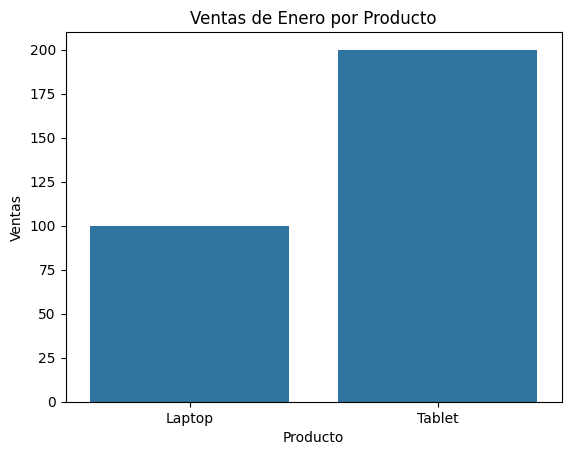

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir el DataFrame de Polars a Pandas
df_pandas = df_pivot.to_pandas()

# Crear un gráfico de barras con Seaborn
sns.barplot(data=df_pandas, x='Producto', y='Enero')
plt.title('Ventas de Enero por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.show()

### **1. Concatenación de DataFrames con Polars**

La **concatenación** de DataFrames se utiliza para unir dos o más DataFrames, ya sea apilándolos verticalmente (filas) o uniéndolos horizontalmente (columnas). En Polars, utilizamos la función **`pl.concat()`** para realizar esta operación.

#### **Concatenación Vertical (Agregar Filas)**

Esta es la forma más común de concatenación, en la que los DataFrames se apilan uno debajo del otro.

**Ejemplo: Concatenar dos DataFrames verticalmente**

In [3]:
# Crear dos DataFrames de ejemplo
df1 = pl.DataFrame({
    'Producto': ['Laptop', 'Tablet'],
    'Precio': [1000, 500]
})

df2 = pl.DataFrame({
    'Producto': ['Smartphone', 'Monitor'],
    'Precio': [800, 300]
})

# Concatenar los DataFrames verticalmente
df_concatenado = pl.concat([df1, df2])

print(df_concatenado)

shape: (4, 2)
┌────────────┬────────┐
│ Producto   ┆ Precio │
│ ---        ┆ ---    │
│ str        ┆ i64    │
╞════════════╪════════╡
│ Laptop     ┆ 1000   │
│ Tablet     ┆ 500    │
│ Smartphone ┆ 800    │
│ Monitor    ┆ 300    │
└────────────┴────────┘


En este ejemplo, `pl.concat()` apila las filas de `df1` y `df2` en un solo DataFrame.

#### **Concatenación Horizontal (Agregar Columnas)**

Puedes usar `pl.concat()` con el argumento `how='horizontal'` para unir DataFrames por columnas.

**Ejemplo: Concatenar dos DataFrames horizontalmente**

In [4]:
# Crear dos DataFrames de ejemplo
df3 = pl.DataFrame({
    'Producto': ['Laptop', 'Tablet'],
    'Cantidad': [5, 10]
})

df4 = pl.DataFrame({
    'Precio': [1000, 500],
    'Descuento': [0.1, 0.2]
})

# Concatenar los DataFrames horizontalmente
df_concatenado_hor = pl.concat([df3, df4], how='horizontal')

print(df_concatenado_hor)

shape: (2, 4)
┌──────────┬──────────┬────────┬───────────┐
│ Producto ┆ Cantidad ┆ Precio ┆ Descuento │
│ ---      ┆ ---      ┆ ---    ┆ ---       │
│ str      ┆ i64      ┆ i64    ┆ f64       │
╞══════════╪══════════╪════════╪═══════════╡
│ Laptop   ┆ 5        ┆ 1000   ┆ 0.1       │
│ Tablet   ┆ 10       ┆ 500    ┆ 0.2       │
└──────────┴──────────┴────────┴───────────┘


En este caso, las columnas de `df3` y `df4` se combinan en un solo DataFrame.

### **2. Merge de DataFrames con Polars**

El **merge** (unión) de DataFrames en Polars se realiza con la función **`join()`**, que es equivalente a una operación de JOIN en SQL. Esta función permite combinar dos DataFrames basándose en una o más columnas clave comunes.

#### **Tipos de Merge (Join) en Polars:**

- **Inner Join**: Retorna solo las filas que tienen coincidencias en ambos DataFrames.
- **Left Join**: Retorna todas las filas del DataFrame izquierdo y las coincidencias del derecho.
- **Right Join**: Retorna todas las filas del DataFrame derecho y las coincidencias del izquierdo.
- **Outer Join**: Retorna todas las filas de ambos DataFrames, con valores nulos en las filas sin coincidencias.

#### **Ejemplo: Merge usando `join()`**

**Merge utilizando Inner Join**

In [5]:
# Crear dos DataFrames de ejemplo
df5 = pl.DataFrame({
    'Producto': ['Laptop', 'Tablet', 'Smartphone'],
    'Ventas': [100, 200, 150]
})

df6 = pl.DataFrame({
    'Producto': ['Laptop', 'Smartphone', 'Monitor'],
    'Precio': [1000, 800, 300]
})

# Realizar un inner join en la columna 'Producto'
df_merged = df5.join(df6, on='Producto', how='inner')

print(df_merged)

shape: (2, 3)
┌────────────┬────────┬────────┐
│ Producto   ┆ Ventas ┆ Precio │
│ ---        ┆ ---    ┆ ---    │
│ str        ┆ i64    ┆ i64    │
╞════════════╪════════╪════════╡
│ Laptop     ┆ 100    ┆ 1000   │
│ Smartphone ┆ 150    ┆ 800    │
└────────────┴────────┴────────┘


En este ejemplo, el resultado incluirá solo los productos que existen en ambos DataFrames.

**Merge utilizando Left Join**

In [6]:
# Realizar un left join en la columna 'Producto'
df_merged_left = df5.join(df6, on='Producto', how='left')

print(df_merged_left)

shape: (3, 3)
┌────────────┬────────┬────────┐
│ Producto   ┆ Ventas ┆ Precio │
│ ---        ┆ ---    ┆ ---    │
│ str        ┆ i64    ┆ i64    │
╞════════════╪════════╪════════╡
│ Laptop     ┆ 100    ┆ 1000   │
│ Tablet     ┆ 200    ┆ null   │
│ Smartphone ┆ 150    ┆ 800    │
└────────────┴────────┴────────┘
